In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor,transforms
import matplotlib.pyplot as plt
import matplotlib
from torch.utils.data import DataLoader
import torch
import random
from torch import nn

In [2]:
train_data = datasets.CIFAR10(
    root = "image",
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

test_data = datasets.CIFAR10(
    root = "image",
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_data,test_data

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: image
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: image
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [4]:
train_data[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [5]:
img, label = train_data[0]
train_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
class_names = train_data.classes
class_names[label]

'frog'

In [7]:
img.shape

torch.Size([3, 32, 32])

In [8]:
#When working with large datasets (like CIFAR-10), always wrap them in a DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,batch_size = BATCH_SIZE,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size = BATCH_SIZE,shuffle = False)

In [9]:
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape,y_first_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

In [10]:
x_first_batch[0].shape

torch.Size([3, 32, 32])

In [11]:
img = x_first_batch[0]
img = img.permute(1,2,0)
img.shape

torch.Size([32, 32, 3])

Text(0.5, 1.0, 'deer')

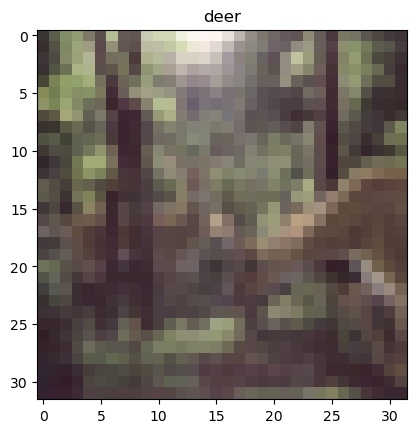

In [12]:
plt.imshow(img) #reshape to torch.Size([32, 32, 3])
plt.title(class_names[y_first_batch[0]])

## Random Pick

Text(0.5, 1.0, 'truck')

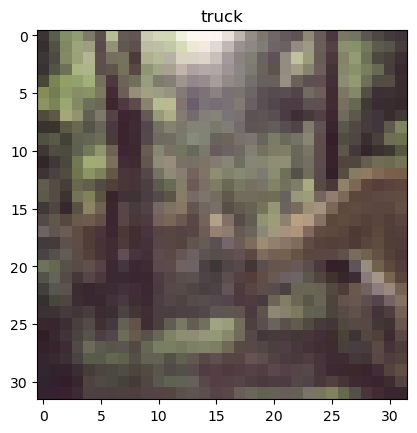

In [13]:
random_img = random.randint(0, len(x_first_batch))
rand_img, rand_label = x_first_batch[random_img], y_first_batch[random_img]
# rand_img = rand_img / 2 + 0.5 

plt.imshow(rand_img.permute(1,2,0))
plt.title(class_names[y_first_batch[rand_label]])

## Flatten

In [14]:
#reference: https://docs.pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten

In [15]:
x_first_batch.shape

torch.Size([32, 3, 32, 32])

In [16]:
x_first_batch[0].shape

torch.Size([3, 32, 32])

In [17]:
f = nn.Flatten(start_dim=0, end_dim=-1) # Default is nn.Flatten(start_dim=1, end_dim=-1) 
f(x_first_batch[0]).shape

torch.Size([3072])

In [18]:
# link to check kernel size, stride, padding
# https://poloclub.github.io/cnn-explainer/

## Model

In [19]:
# reference: https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
conv_layer = nn.Conv2d(in_channels = 3 , out_channels = 16, kernel_size = (3,3) , stride=1, padding=1) 
conv_layer(x_first_batch[0]).shape

torch.Size([16, 32, 32])

In [20]:
# reference: https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d
maxpool = nn.MaxPool2d(kernel_size = (2,2) , stride=2, padding=0)
conv_output = conv_layer(x_first_batch[0])
maxpool(conv_output).shape

torch.Size([16, 16, 16])

In [21]:
# class ImageClassificationModel(nn.Module):
#     def __init__(self,input_shape,output_shape):
#         super().__init__()
#         self.layer_stack = nn.Sequential(
#             nn.Flatten(start_dim = 1, end_dim = -1),  # x_first_batch.shape = torch.Size([32, 3, 32, 32]) should pick(3,32,32). Thus, change start_dim to 1
#             nn.Linear(in_features = input_shape, out_features = 16),
            # nn.ReLU(),
            # nn.Linear(in_features = 16, out_features = 16),
            # nn.ReLU(),
            # nn.Linear(in_features = 16, out_features = output_shape)
#         )

#     def forward(self, x):
#         return self.layer_stack(x)

In [22]:
# Simplified VGG
class ImageClassificationModel(nn.Module):
    def __init__(self,input_shape,output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape, 
                      out_channels = 16, 
                      kernel_size = (3,3), 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 16, 
                      out_channels = 16, 
                      kernel_size = (3,3), 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = (2,2), 
                      stride=2, 
                      padding=0)
            
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = 16, 
                      out_channels = 32, 
                      kernel_size = (3,3), 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 32, 
                      out_channels = 32, 
                      kernel_size = (3,3), 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = (2,2), 
                      stride=2, 
                      padding=0)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(start_dim=1,end_dim=-1),
            nn.Linear(in_features = 32*8*8, out_features = output_shape),
        )

    # def forward(self, x):
    #     return self.conv_block_2(self.conv_block_1(x))
    
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [23]:
torch.manual_seed(87)
model = ImageClassificationModel(3,10)
# model(x_first_batch[0]).shape

In [24]:
# softmax
# reference: https://docs.pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax
# softmax has included in loss function CrossEntropyLoss. So, no need to include

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

ImageClassificationModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=10, bias=True)
  )
)

In [26]:
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01, momentum=0.9, weight_decay=1e-4) 

In [27]:
def accuracy_fn(y_pred, y_true):
    correct_num = (y_pred == y_true).sum()
    acc = correct_num / len(y_true) * 100
    return acc

In [28]:
def train_step(dataloader, model, cost_fn, optimizer, accuracy_fn, device):
    train_cost = 0
    train_acc = 0
    for batch, (x, y) in enumerate(dataloader):

        x = x.to(device)
        y = y.to(device)
        
        model.train()
        y_pred =  model(x)
        cost = cost_fn(y_pred,y)
        train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

        train_cost += cost

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

    train_cost /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    print(f"\nTrain Cost: {train_cost:.4f}, {train_acc:.2f}")

def test_step(dataloader, model, cost_fn, accuracy_fn, device):
    test_cost = 0
    test_acc = 0
    model.eval()
    with torch.inference_mode():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)
            test_pred =  model(x)
            
            test_cost += cost_fn(test_pred,y)
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

        test_cost /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Test Cost: {test_cost:.4f}, {test_acc:.2f} \n")

In [29]:
epochs = 10
for epoch in range(epochs):
    print(f"Epoch: {epoch} \n -----")

    train_step(train_dataloader, model, cost_fn, optimizer, accuracy_fn, device)

    test_step(test_dataloader, model, cost_fn, accuracy_fn, device)  

Epoch: 0 
 -----

Train Cost: 1.7636, 35.42
Test Cost: 1.5099, 45.74 

Epoch: 1 
 -----

Train Cost: 1.2851, 54.07
Test Cost: 1.1782, 58.42 

Epoch: 2 
 -----

Train Cost: 1.0578, 62.91
Test Cost: 1.0872, 61.75 

Epoch: 3 
 -----

Train Cost: 0.9493, 66.82
Test Cost: 0.9439, 67.02 

Epoch: 4 
 -----

Train Cost: 0.8837, 69.32
Test Cost: 0.9153, 68.05 

Epoch: 5 
 -----

Train Cost: 0.8321, 70.87
Test Cost: 0.9564, 66.73 

Epoch: 6 
 -----

Train Cost: 0.7944, 72.40
Test Cost: 0.9274, 68.81 

Epoch: 7 
 -----

Train Cost: 0.7701, 73.09
Test Cost: 0.9251, 68.60 

Epoch: 8 
 -----

Train Cost: 0.7517, 73.75
Test Cost: 0.9626, 67.29 

Epoch: 9 
 -----

Train Cost: 0.7350, 74.39
Test Cost: 0.9869, 66.85 

